In [1]:
from tropy.learn import fit_hyperplane, fit_classifier
from tropy.metrics import accuracy_precision_recall_confusion
from tropy.graph import plot_confusion_matrix, init_ax, plot_hyperplane
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/fifa_2023.csv')
df = df[df["rating"] < 80]
features = ["SHO", "PAS", "DRI"]
df_plus = df[df["position"] == "ST"][features]
df_minus = df[df["position"] == "CB"][features]

In [3]:
df_plus_train, df_plus_test = train_test_split(df_plus, test_size=0.2, random_state=42)
df_minus_train, df_minus_test = train_test_split(df_minus, test_size=0.2, random_state=42)

In [4]:
Cplus_train = df_plus_train.to_numpy(dtype=float).T
Cminus_train = df_minus_train.to_numpy(dtype=float).T
Cplus_test = df_plus_test.to_numpy(dtype=float).T
Cminus_test = df_minus_test.to_numpy(dtype=float).T

In [5]:
Cplus_trans, Cminus_trans, x, l = fit_hyperplane(Cplus_train, Cminus_train, N=100)
print("Apex:", x)
print("Margin:", abs(l))

 21%|██        | 21/100 [00:00<00:00, 2292.51it/s]

Apex: [-0.33333381 -4.33333309  4.66666691]
Margin: 0


In [6]:
predictor, _ = fit_classifier([Cminus_train, Cplus_train], x)

Apex: [-0.33333381 -4.33333309  4.66666691]
Margin: 0
Accuracy: 0.949
Precision: 0.892
Recall: 0.99


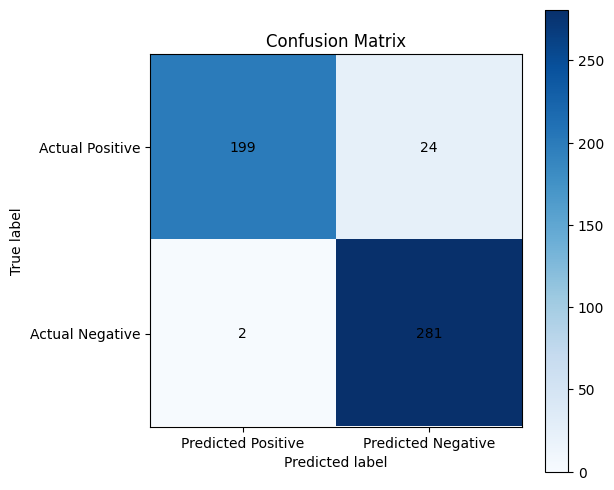

In [7]:
accuracy, precision, recall, confusion_matrix = accuracy_precision_recall_confusion(predictor, Cplus_test, Cminus_test)
print(f"Apex: {x}\nMargin: {np.abs(l)}\nAccuracy: {round(accuracy, 3)}\nPrecision: {round(precision, 3)}\nRecall: {round(recall, 3)}")
plot_confusion_matrix(confusion_matrix)

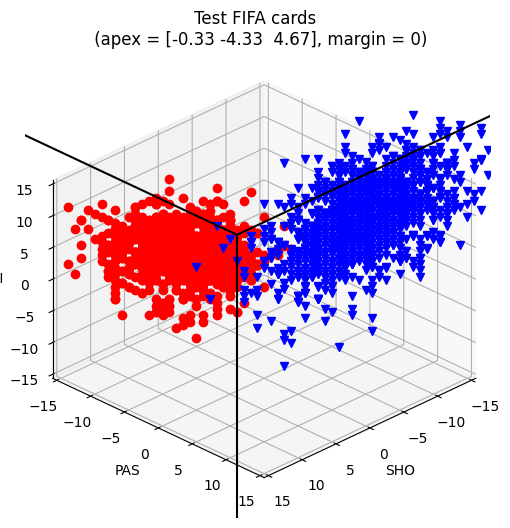

In [8]:
if len(features) == 3:
  fig = plt.figure(figsize=(6,12))
  L = 15
  ax0 = init_ax(fig, 111, L)

  # Train dataset
  ax0.set_xlabel(features[0])
  ax0.set_ylabel(features[1])
  ax0.set_zlabel(features[2])
  plot_hyperplane(ax0, "Test FIFA cards", Cplus_train, Cminus_train, x, l, L, no_branches=True)